#### 1. Goal
The purpose of this project is to do credit card customers analysis and find out possible reasons to customers churning. At the last section, I'll also build a clustering model to further perform customers observation.

#### 2. Dataset
Download from: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

Number of Instances: 10127 with 23 variables (the last 2 naive bayes variables will be dropped)

Definition:
-CLIENTNUM: Client number. Unique identifier for the customer holding the account

-Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0

-Customer_Age: Customer's Age in Years

-Gender: Customer Gender - M=Male, F=Female

-Dependant_count: Number of dependents

-Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)

-Marital_Status: Married, Single, Divorced, Unknown

-Income_Category: Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >

-Card_Category: Type of Card (Blue, Silver, Gold, Platinum)

-Months_on_book: Period of relationship with bank

-Total_Relationship_Count: Total no. of products held by the customer

-Months_Inactive_12_mon: No. of months inactive in the last 12 months

-Contacts_Count_12_mon: No. of Contacts in the last 12 months

-Credit_Limit: Credit Limit on the Credit Card

-Total_Revolving_Bal: Total Revolving Balance on the Credit Card

-Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

-Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

-Total_Trans_Amt: Total Transaction Amount (Last 12 months)

-Total_Trans_Ct: Total Transaction Count (Last 12 months)

-Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

-Avg_Utilization_Ratio: Average Card Utilization Ratio

#### 3. Algorithms
-Kmeans Clustering

#### 4. Procedure
-Files and libraries loading

-Data Preprocessing

-Exploratory Data Analysis

-Data Training

-Kmeans modeling

-Cluster Analysis

## Files and libraries loading

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Read files into dataframe using pandas
def open_file(file_name):
    """
    Open file with specified names
    
    Args: file_name: the filname to read in
    
    Returns: if the file is not found, return failed message
    """
    input_dir = r'./'
    try:
        #use pandas to create dataframe
        df = pd.read_csv(os.path.join(input_dir, file_name + '.csv'))
        return df
    
    except Exception as e:
        print(e)
        print('failed to read the file: ', file_name)

In [3]:
# Read the csv file as dataframe
customerChurn_df = open_file('BankChurners')

In [4]:
customerChurn_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
customerChurn_df.shape

(10127, 23)

In [6]:
# Current variables we have
customerChurn_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Data Preprosessing

In [7]:
# Remove last 2 columns which don't have clear definitions
customerChurn_df = customerChurn_df.iloc[: , :-2]

In [8]:
# The result shows there are 2 columns less
customerChurn_df.shape

(10127, 21)

In [9]:
# Check missing values
customerChurn_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There's no missing values from the above result, so we'll go directly to the 'removing outliers' part.

In [10]:
# Remove outliers
def remove_outliers(df, col_name):
    """
    Remove outliers that are 3 standard deviations away from the mean
    
    Args: df: customer churn dataframe, col: the column to be removed outliers
    
    Return: updated dataframe without outliers
    """

    outlier = df[col_name].std()*3
    lower = df[col_name].mean() - outlier
    upper = df[col_name].mean() + outlier
    
    df = df[(df[col_name] > lower) & (df[col_name] < upper)]
    return df

In [11]:
# Remove outliers if any
for col in customerChurn_df.columns[[np.issubdtype(dt, np.number) for dt in customerChurn_df.dtypes]]:
    churners = remove_outliers(customerChurn_df, col)

In [12]:
# Make Customer Age into groups
bins = [min(customerChurn_df['Customer_Age'])-1, 35, 45, 55, 65, max(customerChurn_df['Customer_Age'])+1]
labels = ['25-34', '35-44', '45-54', '55-64', '65+']

customerChurn_df['Customer_Age_Group'] = pd.cut(customerChurn_df['Customer_Age'], bins, labels = labels)
customerChurn_df['Customer_Age_Group'] = customerChurn_df['Customer_Age_Group'].astype('object')

In [13]:
customerChurn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Exploratory data analysis

In [14]:
# Make sure no duplicates
customerChurn_df['CLIENTNUM'].is_unique

True

#### Pie charts for categorical variables
To understand how customers distributed

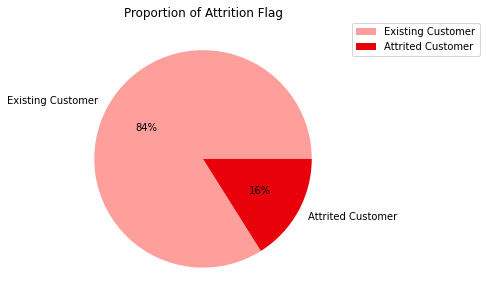

In [15]:
# Attrition_Flag
plt.figure(figsize=(5,5))
plt.title('Proportion of Attrition Flag')
colors = [sns.color_palette('pastel')[3], sns.color_palette('bright')[3]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Attrition_Flag'].value_counts(),
        labels = customerChurn_df['Attrition_Flag'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Attrition_Flag'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

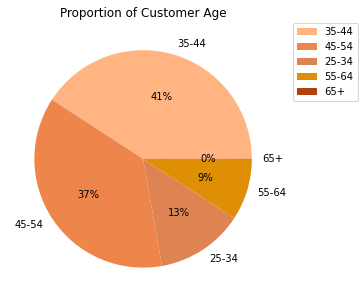

In [16]:
# Customer_Age
plt.figure(figsize=(5,5))
plt.title('Proportion of Customer Age')
colors = [sns.color_palette('pastel')[1], sns.color_palette('muted')[1], sns.color_palette('deep')[1],
          sns.color_palette('colorblind')[1], sns.color_palette('dark')[1]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Customer_Age_Group'].value_counts(),
        labels = customerChurn_df['Customer_Age_Group'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Customer_Age_Group'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

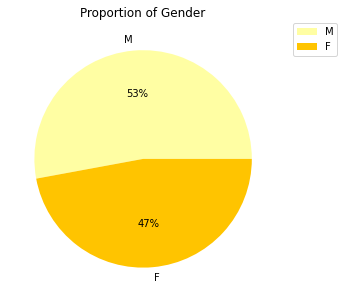

In [17]:
# Gender
plt.figure(figsize=(5,5))
plt.title('Proportion of Gender')
colors = [sns.color_palette('pastel')[8], sns.color_palette('bright')[8]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Gender'].value_counts(),
        labels = customerChurn_df['Gender'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Gender'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

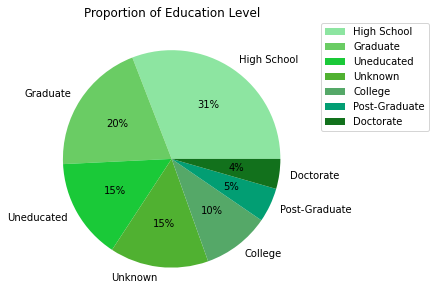

In [18]:
# Education_Level
plt.figure(figsize=(5,5))
plt.title('Proportion of Education Level')
colors = [sns.color_palette('pastel')[2], sns.color_palette('muted')[2], sns.color_palette('bright')[2],
          sns.color_palette('husl')[2], sns.color_palette('deep')[2], sns.color_palette('colorblind')[2],
          sns.color_palette('dark')[2]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Education_Level'].value_counts(),
        labels = customerChurn_df['Education_Level'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Education_Level'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

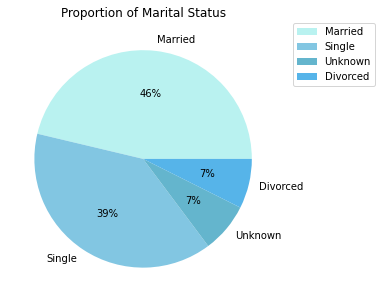

In [19]:
# Marital_Status
plt.figure(figsize=(5,5))
plt.title('Proportion of Marital Status')
colors = [sns.color_palette('pastel')[9], sns.color_palette('muted')[9], sns.color_palette('deep')[9],
          sns.color_palette('colorblind')[9]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Marital_Status'].value_counts(),
        labels = customerChurn_df['Marital_Status'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Marital_Status'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

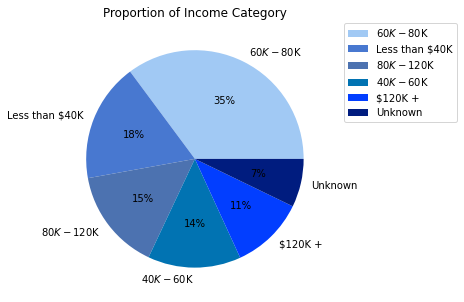

In [20]:
# Income_Category
plt.figure(figsize=(5,5))
plt.title('Proportion of Income Category')
colors = [sns.color_palette('pastel')[0], sns.color_palette('muted')[0], sns.color_palette('deep')[0],
          sns.color_palette('colorblind')[0], sns.color_palette('bright')[0], sns.color_palette('dark')[0]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Income_Category'].value_counts(),
        labels = customerChurn_df['Income_Category'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Income_Category'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

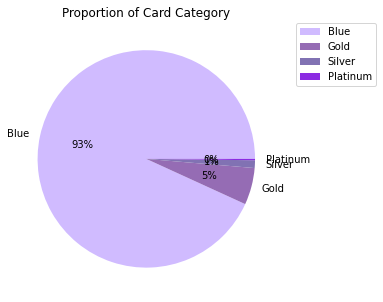

In [21]:
# Card_Category
plt.figure(figsize=(5,5))
plt.title('Proportion of Card Category')
colors = [sns.color_palette('pastel')[4], sns.color_palette('muted')[4], sns.color_palette('deep')[4],
          sns.color_palette('bright')[4]] #define Seaborn color palette to use
plt.pie(customerChurn_df['Card_Category'].value_counts(),
        labels = customerChurn_df['Card_Category'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['Card_Category'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Bivariate analysis
To understand how attrited customers distributed

In [22]:
def attrited_percentage(column):
    """
    Generate an attrited percentage for each group in column
    
    Args: column: column to be calculated the attrited percentage
    
    Returns: return dataframe with attrited flag percentage for each group in specific column
    """
    
    df = pd.DataFrame(columns = ['Group', 'Attrited Percentage(%)'])
    
    for col in customerChurn_df[column].unique():
        percentage = customerChurn_df[(customerChurn_df[column] == col) & (customerChurn_df['Attrition_Flag'] == 'Attrited Customer')][column].count()/customerChurn_df[customerChurn_df[column] == col][column].count()
        df = df.append({'Group' : col, 'Attrited Percentage(%)' : round(percentage*100, 2)}, ignore_index = True)
        
    return df

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


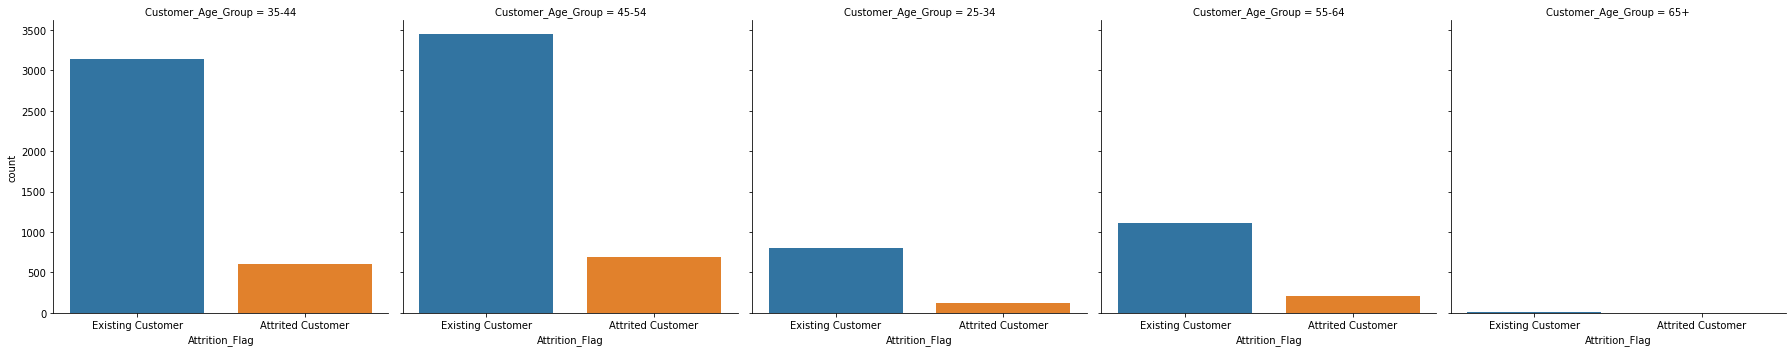

In [23]:
# Customer_Age
sns.factorplot("Attrition_Flag", col = "Customer_Age_Group", col_wrap = 5,
               data = customerChurn_df[customerChurn_df['Customer_Age_Group'].notnull()],
               kind = "count")
plt.show()

In [24]:
age_attrited = attrited_percentage('Customer_Age_Group')
age_attrited

,Group,Attrited Percentage(%)
0,35-44,16.19
1,45-54,16.64
2,25-34,13.28
3,55-64,15.82
4,65+,20.00


People at age 25-34 have the least attrited percentage.
People over age 65 has the most attrited percentage.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


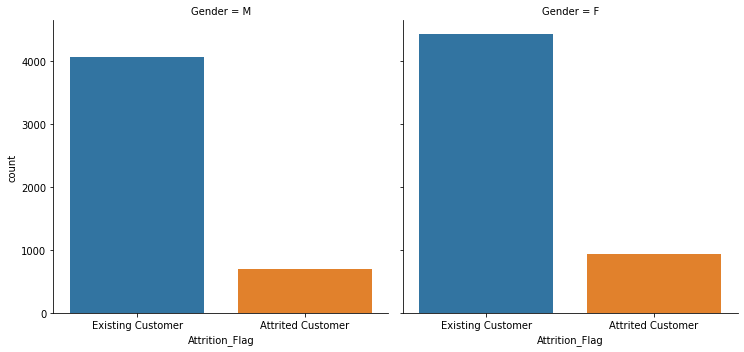

In [25]:
# Gender
sns.factorplot("Attrition_Flag", col = "Gender", col_wrap = 5,
               data = customerChurn_df[customerChurn_df['Gender'].notnull()],
               kind = "count")
plt.show()

In [26]:
gender_attrited = attrited_percentage('Gender')
gender_attrited

,Group,Attrited Percentage(%)
0,M,14.62
1,F,17.36


Female is more likely to attrite than male are.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


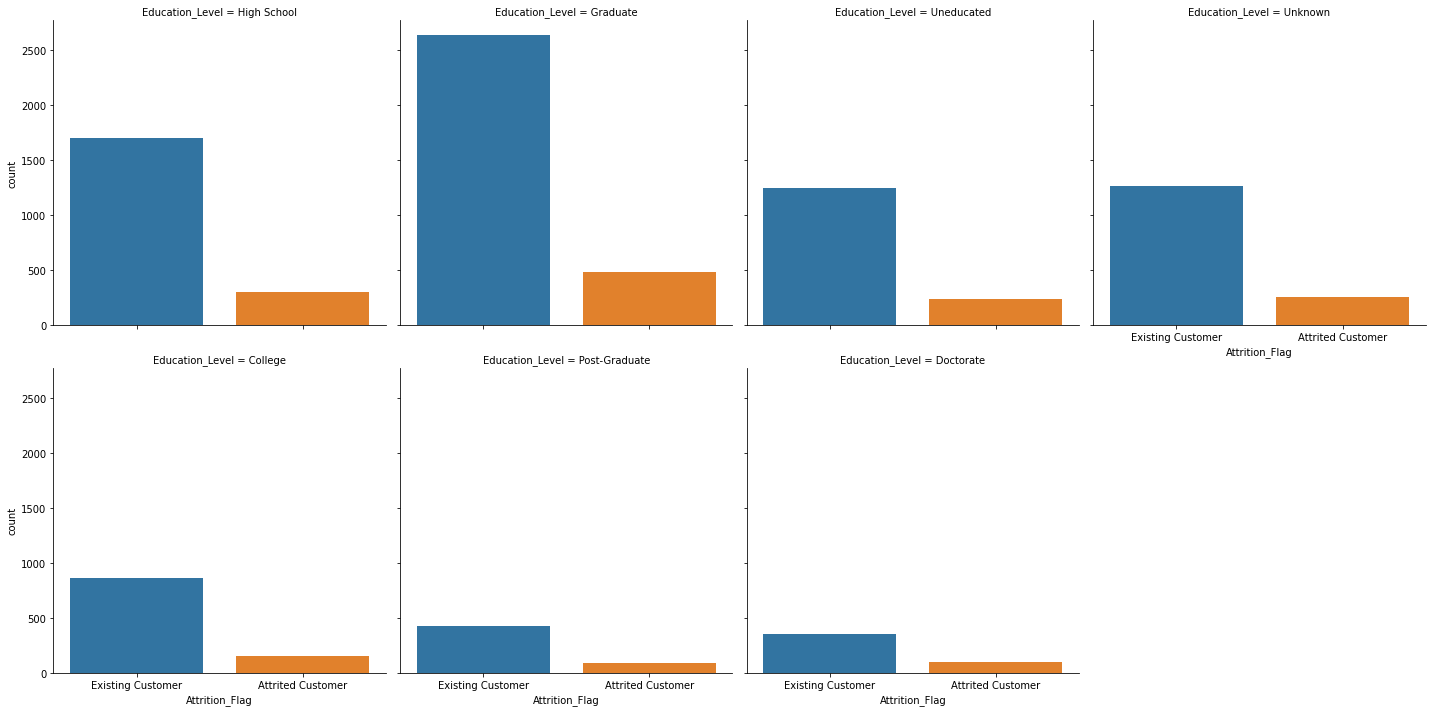

In [27]:
# Education Level
sns.factorplot("Attrition_Flag", col = "Education_Level", col_wrap = 4,
               data = customerChurn_df[customerChurn_df['Education_Level'].notnull()],
               kind = "count")
plt.show()

In [28]:
education_level_attrited = attrited_percentage('Education_Level')
education_level_attrited

,Group,Attrited Percentage(%)
0,High School,15.20
1,Graduate,15.57
2,Uneducated,15.94
3,Unknown,16.85
4,College,15.20
5,Post-Graduate,17.83
6,Doctorate,21.06


People with higher education level are more likely to attrite.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


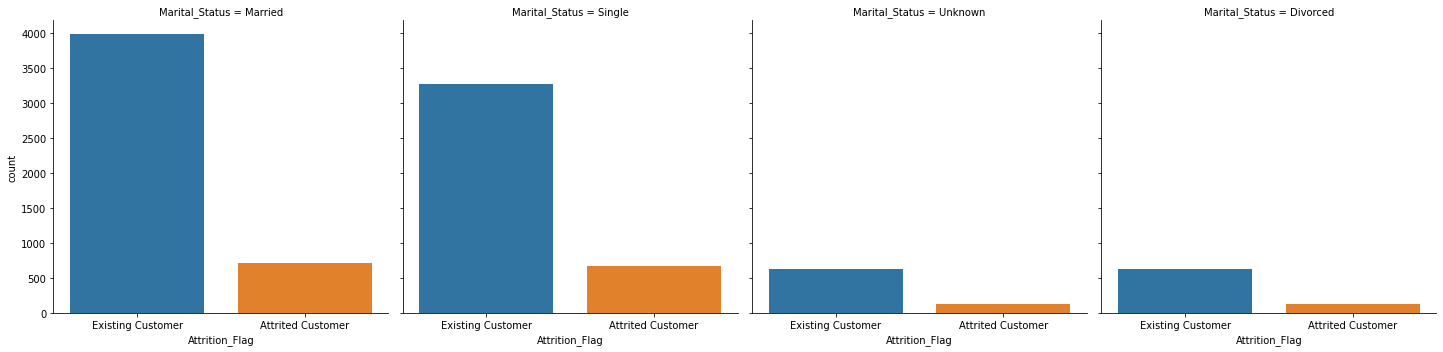

In [29]:
# Marital Status
sns.factorplot("Attrition_Flag", col = "Marital_Status", col_wrap = 5,
               data = customerChurn_df[customerChurn_df['Marital_Status'].notnull()],
               kind = "count")
plt.show()

In [30]:
marital_status_attrited = attrited_percentage('Marital_Status')
marital_status_attrited

,Group,Attrited Percentage(%)
0,Married,15.13
1,Single,16.94
2,Unknown,17.22
3,Divorced,16.18


The attrited percentage doesn't differ much between marital status.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


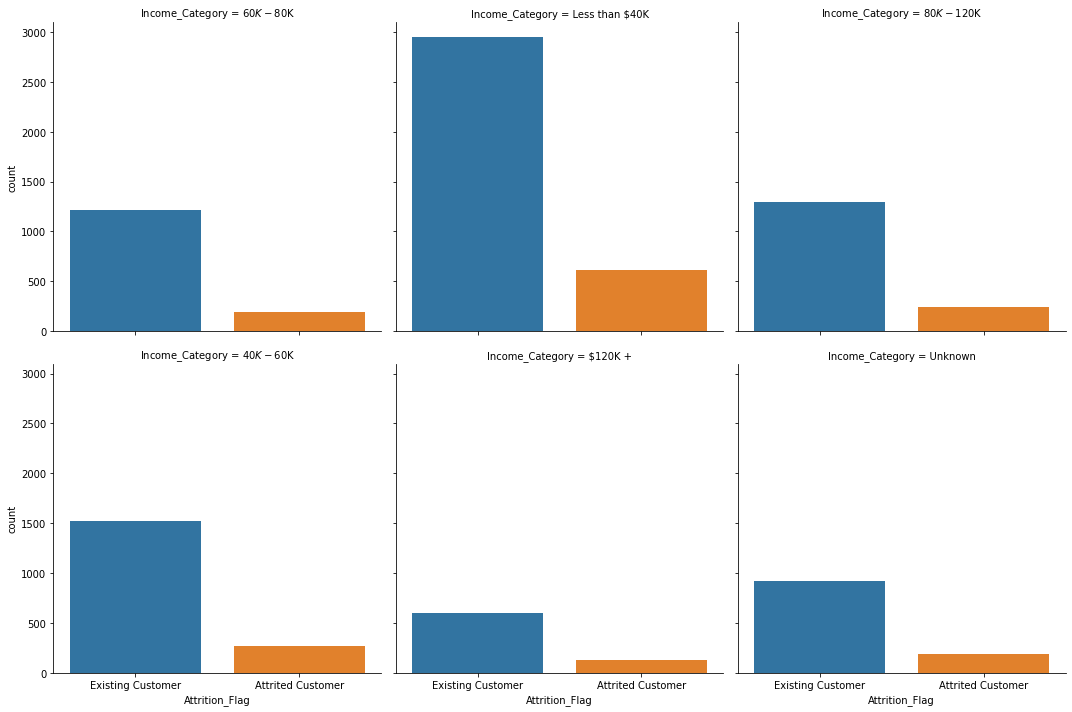

In [31]:
# Income Category
sns.factorplot("Attrition_Flag", col = "Income_Category", col_wrap = 3,
               data = customerChurn_df[customerChurn_df['Income_Category'].notnull()],
               kind = "count")
plt.show()

In [32]:
income_category_attrited = attrited_percentage('Income_Category')
income_category_attrited

,Group,Attrited Percentage(%)
0,$60K - $80K,13.48
1,Less than $40K,17.19
2,$80K - $120K,15.77
3,$40K - $60K,15.14
4,$120K +,17.33
5,Unknown,16.82


People who earn between 60K and 80K are most likely to attrite.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


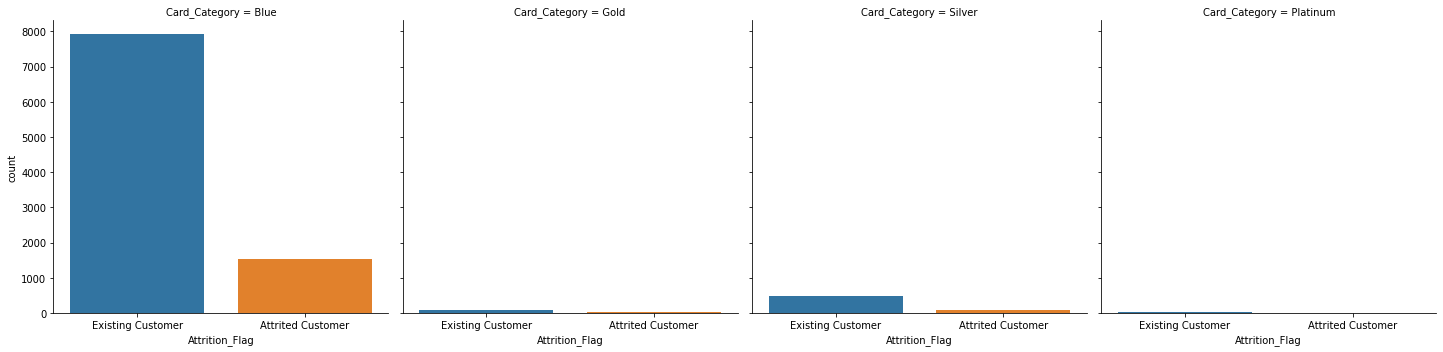

In [33]:
# Card Category
sns.factorplot("Attrition_Flag", col = "Card_Category", col_wrap = 5,
               data = customerChurn_df[customerChurn_df['Card_Category'].notnull()],
               kind = "count")
plt.show()

In [34]:
card_category_attrited = attrited_percentage('Card_Category')
card_category_attrited

,Group,Attrited Percentage(%)
0,Blue,16.10
1,Gold,18.10
2,Silver,14.77
3,Platinum,25.00


People with silver card are the least likely to attrite.
People with platinum card are the most likely to attrite.

#### Histograms for numerical variables

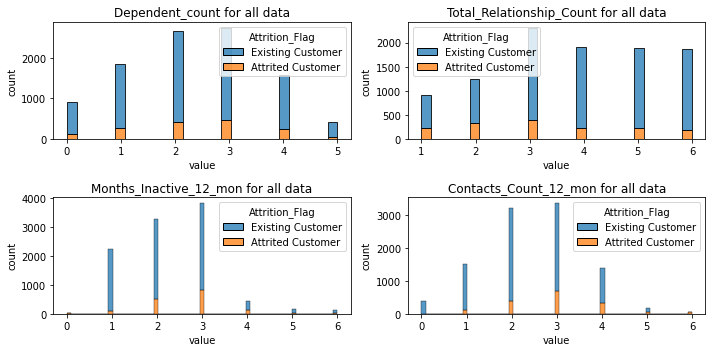

In [35]:
column_list1 = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

fig, ax = plt.subplots(2, 2, figsize=(10,5))
axes_list = [axes for axes_row in ax for axes in axes_row]

# overall customer
for i, col in enumerate(column_list1):
    x = i
    sns.histplot(data = customerChurn_df, x=col, hue='Attrition_Flag', multiple='stack', ax=axes_list[x])
    axes_list[x].set_title(f'{col} for all data')
    axes_list[x].set_xlabel('value')
    axes_list[x].set_ylabel('count')

plt.tight_layout()
plt.show()

The trend for Dependent_count and Total_Relationship_Count are similar since both have most data in the center and less on the side.

The trend for Months_Inactive_12_mon and Contacts_Count_12_mon are similar since both are slightly right-skewed.

The attrited customer trends for all four variables are alike their correspnding existing customer trends.

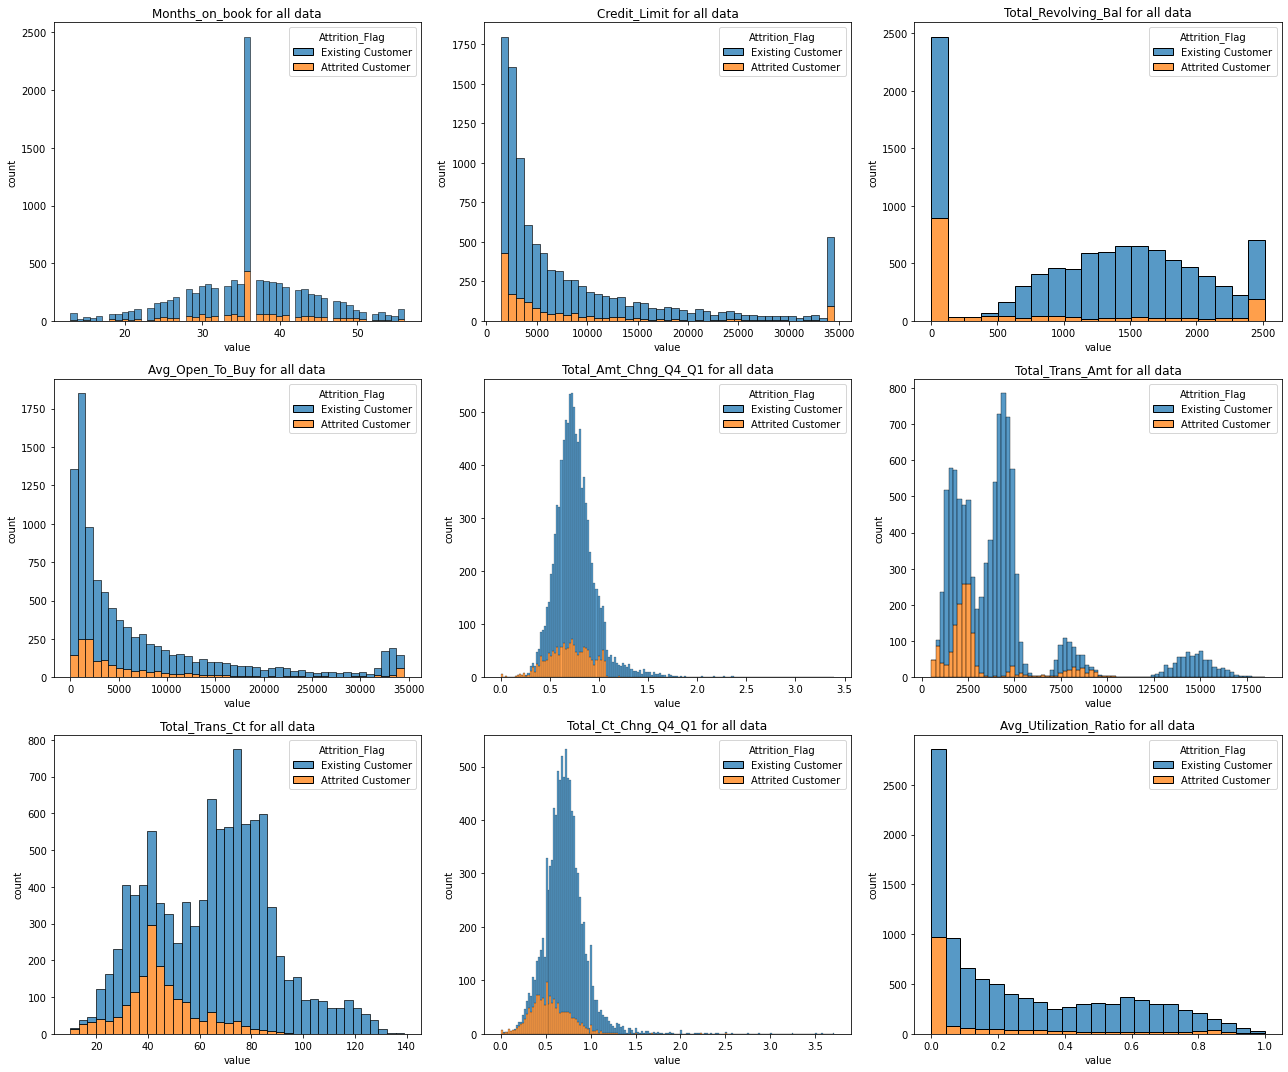

In [36]:
column_list2 = ['Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

fig, ax = plt.subplots(3, 3, figsize=(18,15))
axes_list = [axes for axes_row in ax for axes in axes_row]

# overall customer
for i, col in enumerate(column_list2):
    x = i
    sns.histplot(data = customerChurn_df, x=col, hue='Attrition_Flag', multiple='stack', ax=axes_list[x])
    axes_list[x].set_title(f'{col} for all data')
    axes_list[x].set_xlabel('value')
    axes_list[x].set_ylabel('count')

plt.tight_layout()
plt.show()

1.It's obvious that most customers stay about 35 months on book.

2.Except Months_on_book, Total_Trans_Amt and Total_Trans_Ct, the distributions for the rest variables are highly right-skewed. Among that, there is a small group of people with high credit limit, high total revolving balance, more time from open to buy credit line and more total transaction amount.

3.For Total_Trans_Amt and Total_Trans_Ct, the distributions are slightly right-skewed. Among that, there are four peaks in the Total_Trans_Amt distribution and 2 peaks in the Total_Trans_Ct distribution.

In [37]:
df = pd.DataFrame(columns = ['Group', 'Attrited Percentage(%)'])
months_on_book_mode = customerChurn_df['Months_on_book'].mode()[0]
    
percentage1 = customerChurn_df[(customerChurn_df['Months_on_book'] < months_on_book_mode) & (customerChurn_df['Attrition_Flag'] == 'Attrited Customer')]['Months_on_book'].count()/customerChurn_df[customerChurn_df['Months_on_book'] < months_on_book_mode]['Months_on_book'].count()
percentage2 = customerChurn_df[(customerChurn_df['Months_on_book'] == months_on_book_mode) & (customerChurn_df['Attrition_Flag'] == 'Attrited Customer')]['Months_on_book'].count()/customerChurn_df[customerChurn_df['Months_on_book'] == months_on_book_mode]['Months_on_book'].count()
percentage3 = customerChurn_df[(customerChurn_df['Months_on_book'] > months_on_book_mode) & (customerChurn_df['Attrition_Flag'] == 'Attrited Customer')]['Months_on_book'].count()/customerChurn_df[customerChurn_df['Months_on_book'] > months_on_book_mode]['Months_on_book'].count()

df = df.append({'Group' : 'New Customer', 'Attrited Percentage(%)' : round(percentage1*100, 2)}, ignore_index = True)
df = df.append({'Group' : 'Medium Customer', 'Attrited Percentage(%)' : round(percentage2*100, 2)}, ignore_index = True)
df = df.append({'Group' : 'Old Customer', 'Attrited Percentage(%)' : round(percentage3*100, 2)}, ignore_index = True)
df

,Group,Attrited Percentage(%)
0,New Customer,14.91
1,Medium Customer,17.46
2,Old Customer,16.31


In [38]:
months_on_book_mode

36

Old customers are more likely to attrite than new customers are.

## Data Training

In [39]:
def label_encoding(df, columns):
    """
    Label encode columns
    
    Args: df: dataframe, columns: columns to be encoded
    
    Returns: return dataframe with columns label encoded
    """

    df = df.copy()
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])
    
    return df

In [40]:
original_df = pd.DataFrame(columns = ['Education_Level_Original', 'Income_Category_Original', 'Card_Category_Original'])
original_df['Education_Level_Original'] = customerChurn_df['Education_Level']
original_df['Income_Category_Original'] = customerChurn_df['Income_Category']
original_df['Card_Category_Original'] = customerChurn_df['Card_Category']

In [41]:
# label encoding
for col in ['Education_Level', 'Income_Category', 'Card_Category']:
    customerChurn_df = label_encoding(customerChurn_df, col)

In [42]:
cols = customerChurn_df.select_dtypes(['uint8', 'int64', 'float64']).columns

## Kmeans modeling

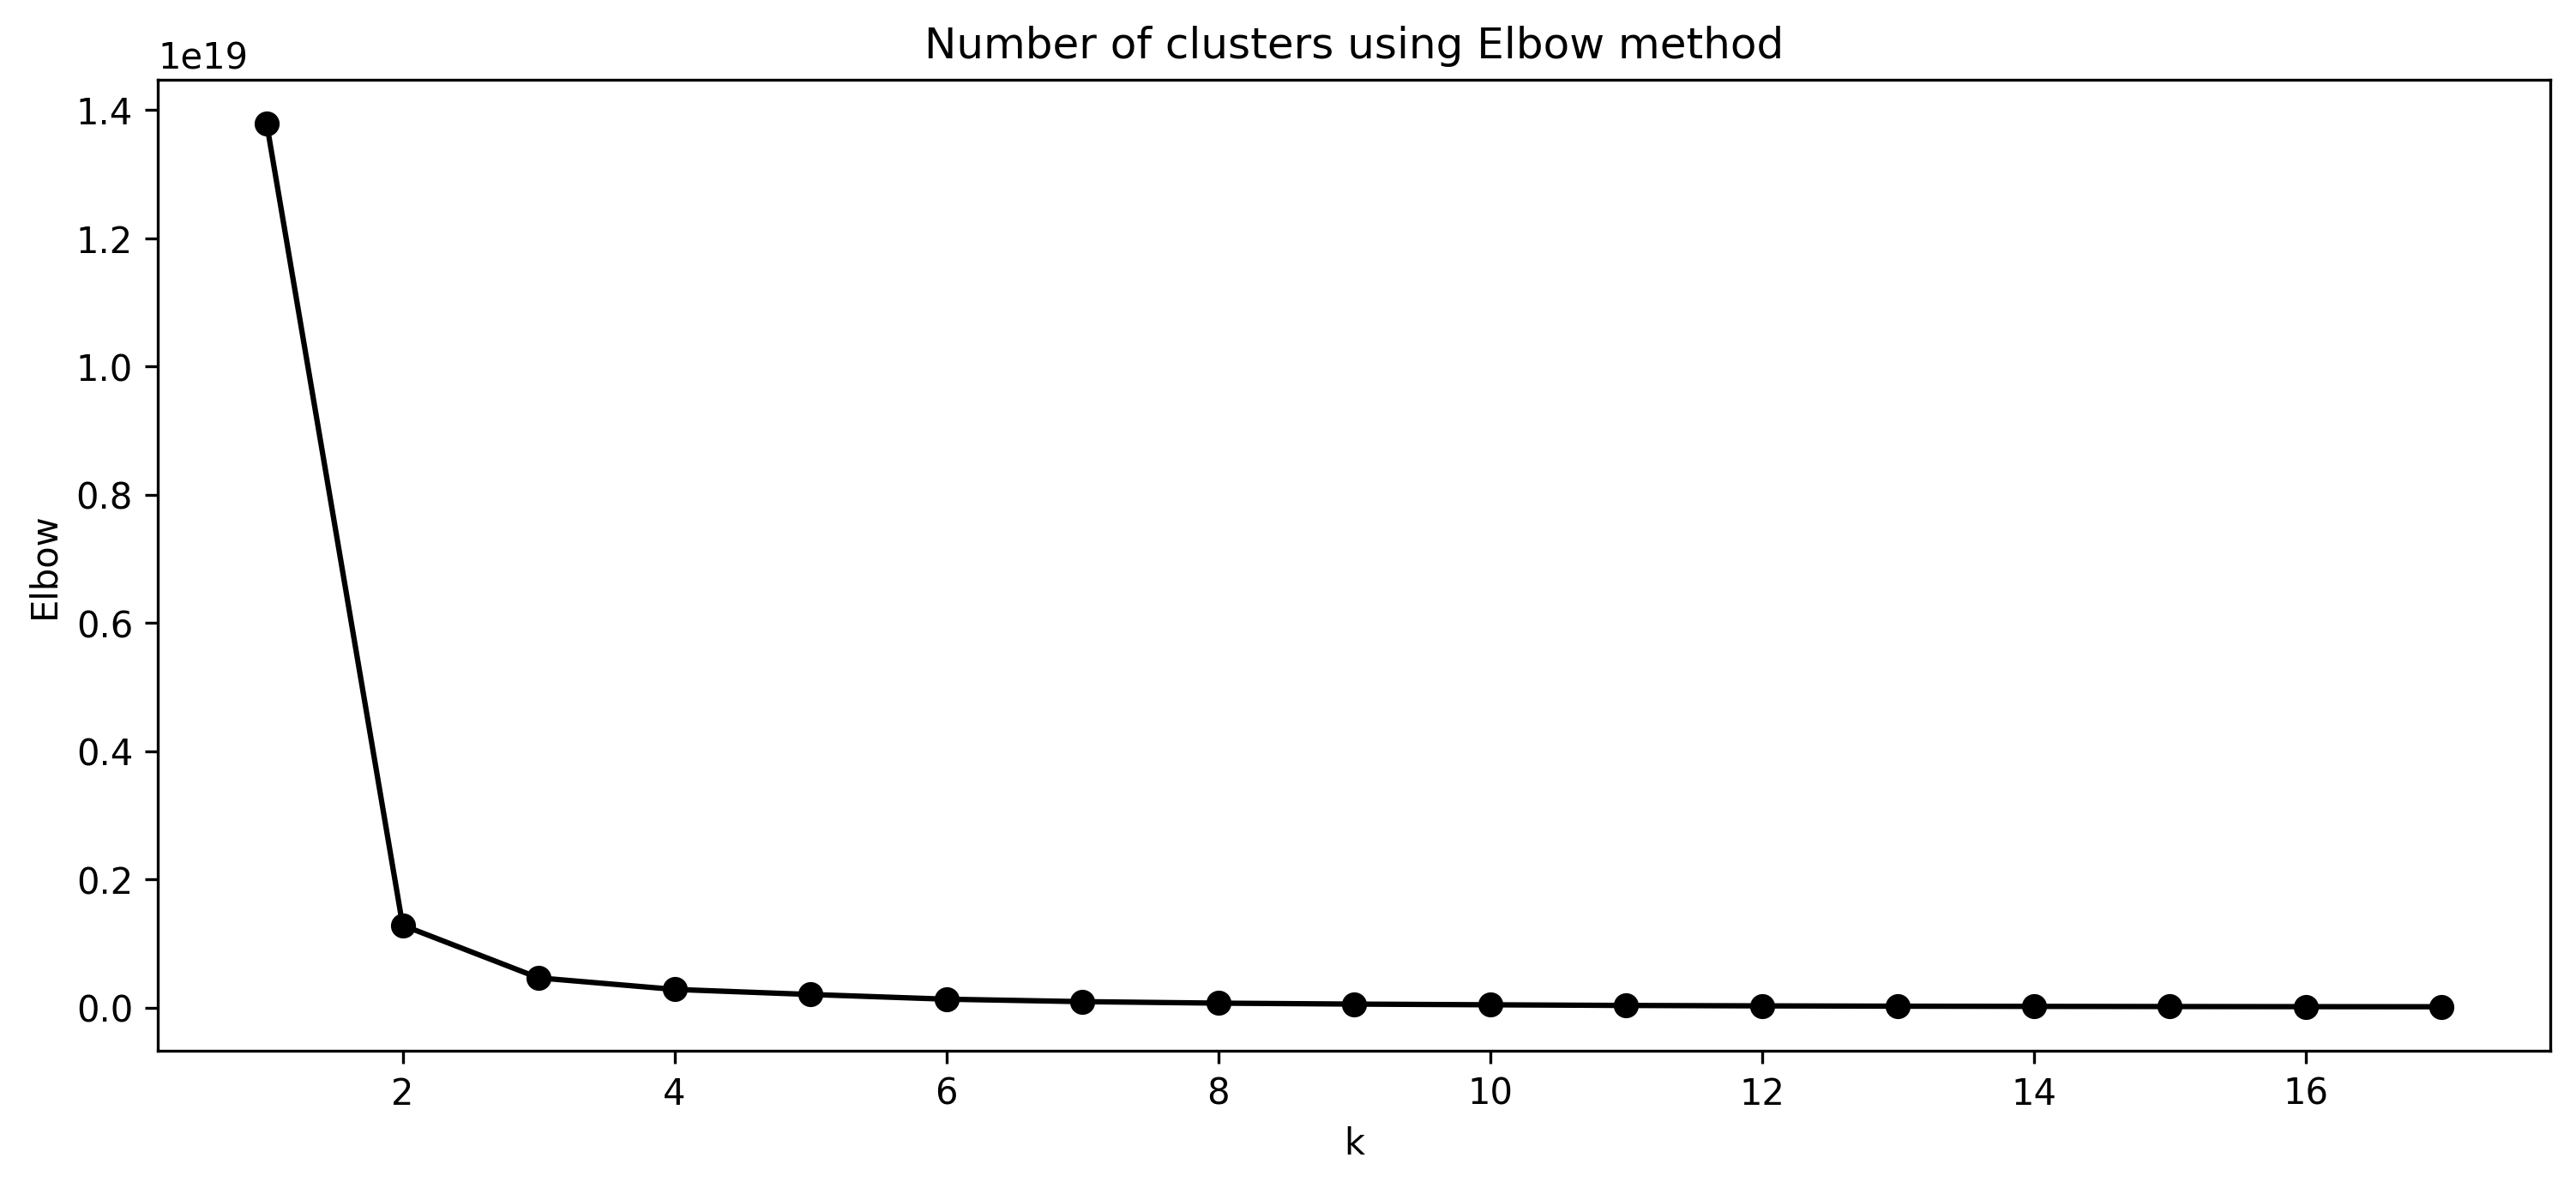

In [43]:
# Identify the number of clusters using Elbow method
elbow = []
K = range(1,18)

for k in K:
    model = KMeans(n_clusters = k)
    model.fit(customerChurn_df[cols])
    elbow.append(model.inertia_)
    
# Plot clusters using elbow method
plt.figure(figsize=(12,5), dpi=300)
plt.plot(K, elbow, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Elbow')
plt.title('Number of clusters using Elbow method')
plt.show()

The elbow method shows that the curve flatten starting from around k=3. So I'll use k=3 in the following kmeans tuning step.

In [44]:
# data scaling and apply pca
preprocessor = Pipeline(
[
 ("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=1)) #in order to reduce noise
]
)

# set the model and its parameters
clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=3,
                   init="k-means++",
                   n_init=20,
                   max_iter=500,
                   random_state=1
                      )
       )
      ]
   )

In [45]:
# construct model with ready-to-use preprocessor and clusterer
pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )
pipe.fit(customerChurn_df[cols])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=20,
                                         random_state=1))]))])

In [46]:
# create datafram for result visualization
customerChurn_df_cluster = pd.DataFrame(
    pipe["preprocessor"].transform(customerChurn_df[cols]),
    columns=["component_1", "component_2"]
)
customerChurn_df_cluster['predicted_clusters'] = pipe["clusterer"]["kmeans"].labels_

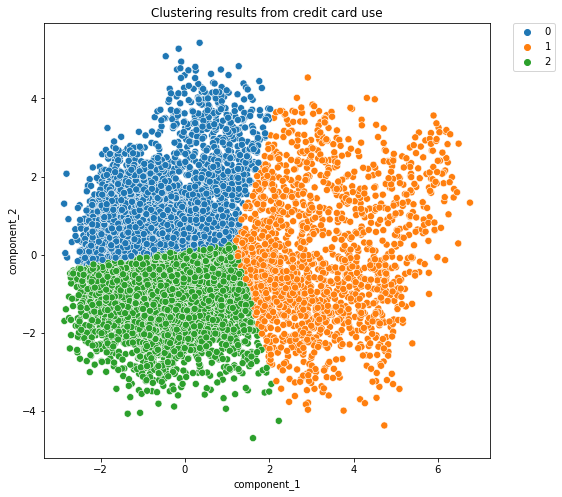

In [47]:
plt.figure(figsize=(8, 8))
plt.title('Clustering results from credit card use')
sns.scatterplot(
    x = "component_1",
    y = "component_2",
    s = 50,
    data = customerChurn_df_cluster,
    hue = "predicted_clusters",
    palette = 'tab10'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

## Cluster analysis

In [48]:
customerChurn_df['cluster'] = pipe['clusterer']['kmeans'].labels_
customerChurn_df = pd.concat([customerChurn_df, original_df], axis=1, join='inner')
customerChurn_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_Group,cluster,Education_Level_Original,Income_Category_Original,Card_Category_Original
0,768805383,Existing Customer,45,M,3,3,Married,2,0,39,...,1.335,1144,42,1.625,0.061,35-44,2,High School,$60K - $80K,Blue
1,818770008,Existing Customer,49,F,5,2,Single,4,0,44,...,1.541,1291,33,3.714,0.105,45-54,0,Graduate,Less than $40K,Blue
2,713982108,Existing Customer,51,M,3,2,Married,3,0,36,...,2.594,1887,20,2.333,0.000,45-54,0,Graduate,$80K - $120K,Blue
3,769911858,Existing Customer,40,F,4,3,Unknown,4,0,34,...,1.405,1171,20,2.333,0.760,35-44,0,High School,Less than $40K,Blue
4,709106358,Existing Customer,40,M,3,5,Married,2,0,21,...,2.175,816,28,2.500,0.000,35-44,0,Uneducated,$60K - $80K,Blue


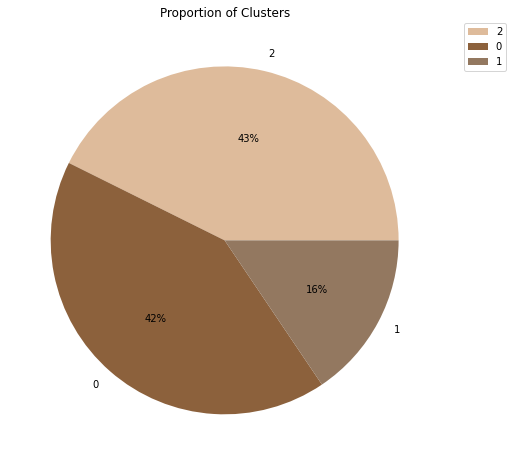

In [49]:
plt.figure(figsize=(12,8))
plt.title('Proportion of Clusters')
colors = [sns.color_palette('pastel')[5], sns.color_palette('muted')[5], sns.color_palette('deep')[5]] #define Seaborn color palette to use
plt.pie(customerChurn_df['cluster'].value_counts(),
        labels = customerChurn_df['cluster'].unique().tolist(),
        colors = colors, autopct='%.0f%%') #create pie chart
plt.legend(labels=customerChurn_df['cluster'].unique().tolist(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Grouop 0 and group 2 has close proportion, which is around 42-43%.

/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eatingyeh/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


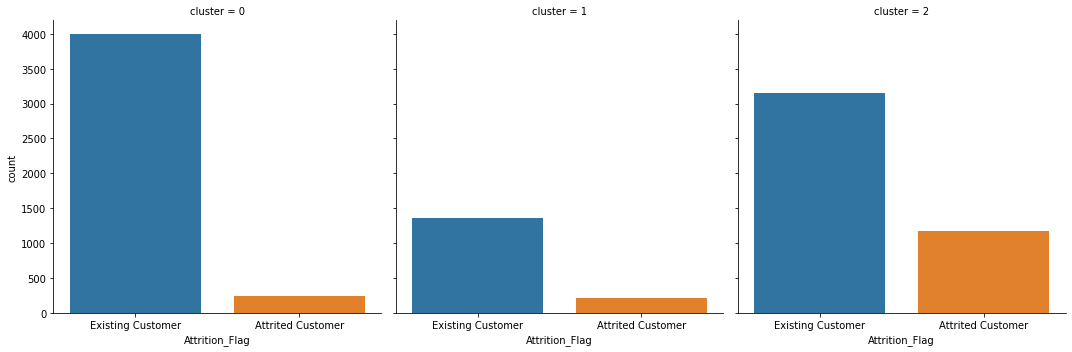

In [50]:
sns.factorplot("Attrition_Flag", col = "cluster", col_wrap = 3,
               data = customerChurn_df[customerChurn_df['cluster'].notnull()],
               kind = "count")
plt.show()

Cluster 0: has the least percentage of attrited customers.

Cluster 1: has the least number of customers.

Cluster 2: has the most percentage of attrited customers.

In [51]:
cols = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [52]:
scaler = StandardScaler()
customerChurn_df_scaled = pd.DataFrame(scaler.fit_transform(customerChurn_df[cols]), columns=cols)
customerChurn_df_scaled['cluster'] = pipe['clusterer']['kmeans'].labels_

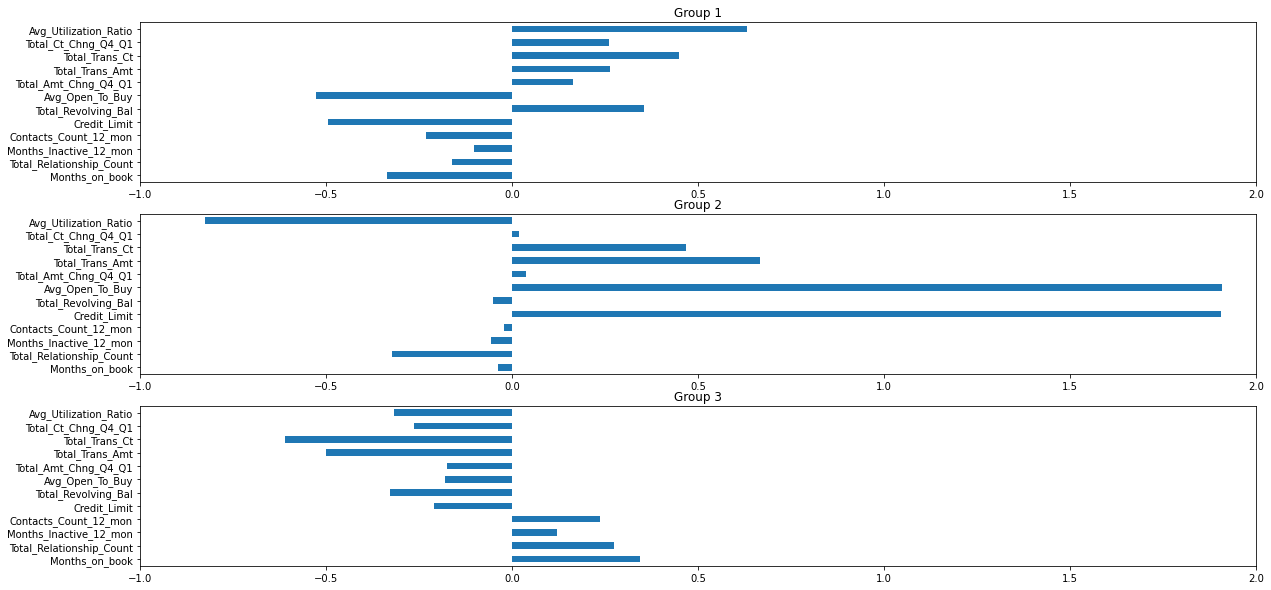

In [53]:
fix, axs = plt.subplots(nrows=3, figsize=(20,6))

customerChurn_df_scaled[customerChurn_df_scaled['cluster'] == 0][cols].mean().plot.barh(ax=axs[0], xlim=(-1, 2), figsize=(20,10), sharey=True, title='Group 1')
customerChurn_df_scaled[customerChurn_df_scaled['cluster'] == 1][cols].mean().plot.barh(ax=axs[1], xlim=(-1, 2), figsize=(20,10), sharey=True, title='Group 2')
customerChurn_df_scaled[customerChurn_df_scaled['cluster'] == 2][cols].mean().plot.barh(ax=axs[2], xlim=(-1, 2), figsize=(20,10), sharey=True, title='Group 3')

plt.show()

Group 1: high balance low limit short-term heavy user

 -High utilization ratio, high change transaction count and amount, high transaction count and amount, high balance
 
 -Low avg open to buy, low credit limit, low contacts count, low inactive months, low relationshop count, low months on book

Group 2: high limit heavy user

 -Low utilization ratio, high transaction count and amount, high avg open to buy, high limit
 
 -Low contacts count, low inactive months, low relationshop count, low months on book

Group 3: low balance low limit long-time light user

 -Low utilization ratio, low change transaction count and amount, low transaction count and amount, low avg open to buy, low balance, low limit
 
 -High contacts count, high inactive months, high relationshop count, high months on book

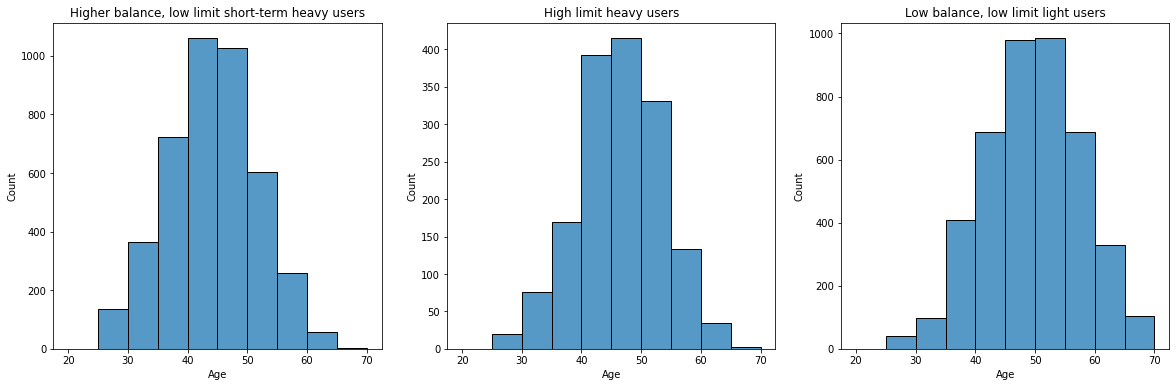

In [54]:
# Age
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

sns.histplot(customerChurn_df[customerChurn_df['cluster'] == 0]['Customer_Age'], ax=axs[0], binrange=(20,70), binwidth=5).set(title='Higher balance, low limit short-term heavy users', ylabel='Count', xlabel='Age')
sns.histplot(customerChurn_df[customerChurn_df['cluster'] == 1]['Customer_Age'], ax=axs[1], binrange=(20,70), binwidth=5).set(title='High limit heavy users', ylabel='Count', xlabel='Age')
sns.histplot(customerChurn_df[customerChurn_df['cluster'] == 2]['Customer_Age'], ax=axs[2], binrange=(20,70), binwidth=5).set(title='Low balance, low limit light users', ylabel='Count', xlabel='Age')

plt.show()

Group 1: high balance low limit short-term heavy user

Most people fall between age 40-45 and 45-50. And second most people fall between age 35-40, slightly younger.

Group 2: high limit heavy user

Most people fall between age 40-45 and 45-50. And second most people fall between age 50-55, slightly older.

Group 3: low balance low limit long-time light user

Most people fall between age 45-50 and 50-55. And second most people fall between age 40-45 and 55-60. This group obviously includes more old users than the other two groups do.

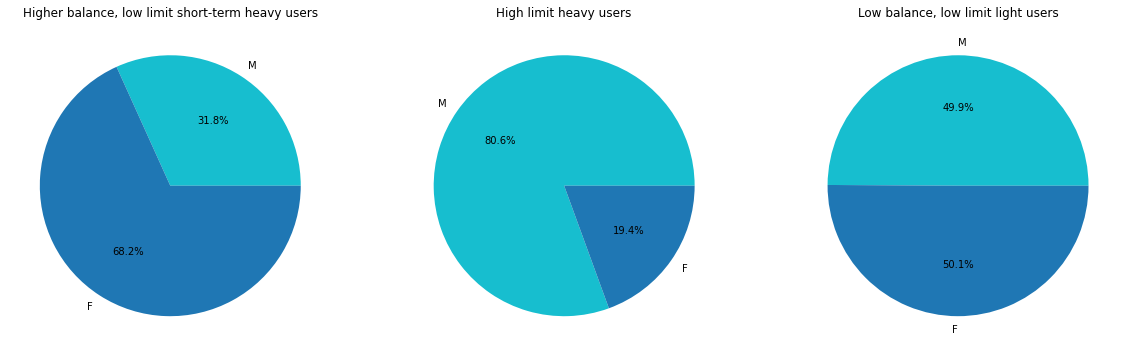

In [55]:
# Gender
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

customerChurn_df[customerChurn_df['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0], ylabel='', title='Higher balance, low limit short-term heavy users', colors=['tab:cyan','tab:blue'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1], ylabel='', title='High limit heavy users', colors=['tab:cyan','tab:blue'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2], ylabel='', title='Low balance, low limit light users', colors=['tab:cyan','tab:blue'], autopct='%.1f%%')

plt.show()

Group 1: high balance low limit short-term heavy user

Majority of this group is female.

Group 2: high limit heavy user

Majority of this group is male.

Group 3: low balance low limit long-time light user

Male and female have about equal proportion in this group.

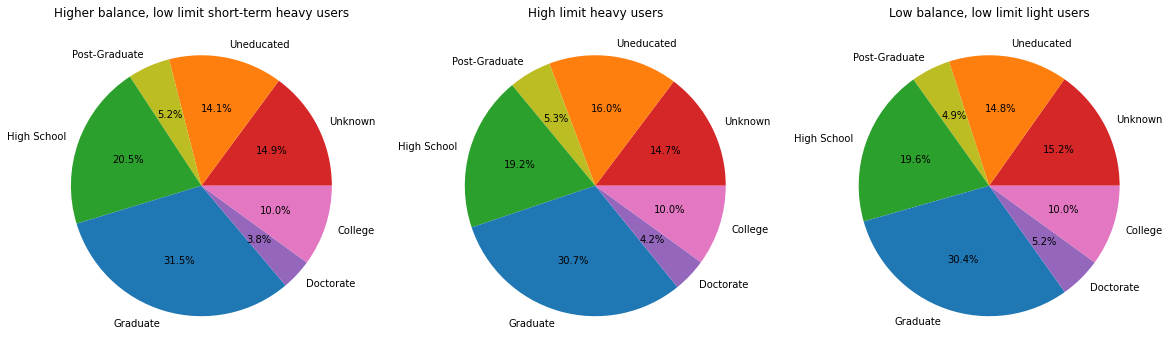

In [56]:
# Education Level
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

customerChurn_df[customerChurn_df['cluster'] == 0]['Education_Level_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0], ylabel='', title='Higher balance, low limit short-term heavy users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 1]['Education_Level_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1], ylabel='', title='High limit heavy users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 2]['Education_Level_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2], ylabel='', title='Low balance, low limit light users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple','tab:pink'], autopct='%.1f%%')

plt.show()

Education level distributed very similar between 3 groups. People with graduate level make up the most proportion, people with high school level the second most and people with post-graduat the least.

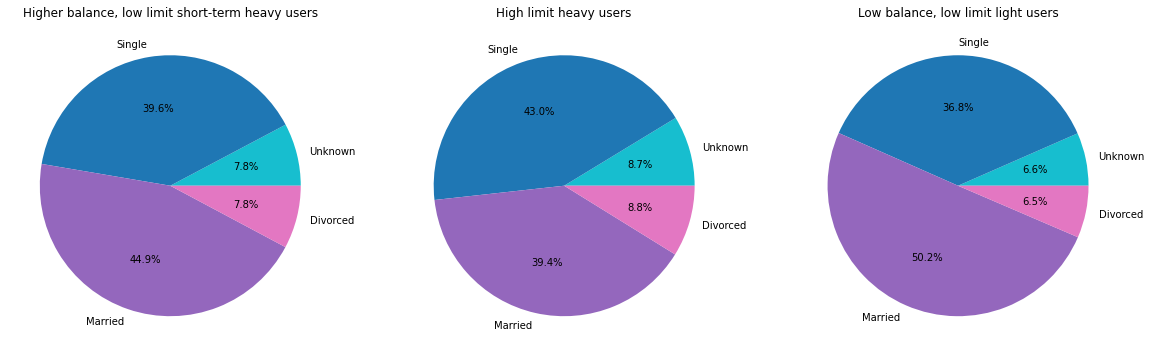

In [57]:
# Marital Status
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

customerChurn_df[customerChurn_df['cluster'] == 0]['Marital_Status'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0], ylabel='', title='Higher balance, low limit short-term heavy users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 1]['Marital_Status'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1], ylabel='', title='High limit heavy users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 2]['Marital_Status'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2], ylabel='', title='Low balance, low limit light users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')

plt.show()

The add up percentage of single and married customers is over 80% for all 3 groups.

Group 1: high balance low limit short-term heavy user

Married customers account for the most and single customers the second most.

Group 2: high limit heavy user

Single customers account for the most and married customers the second most.

Group 3: low balance low limit long-time light user

Over half of customer are married.

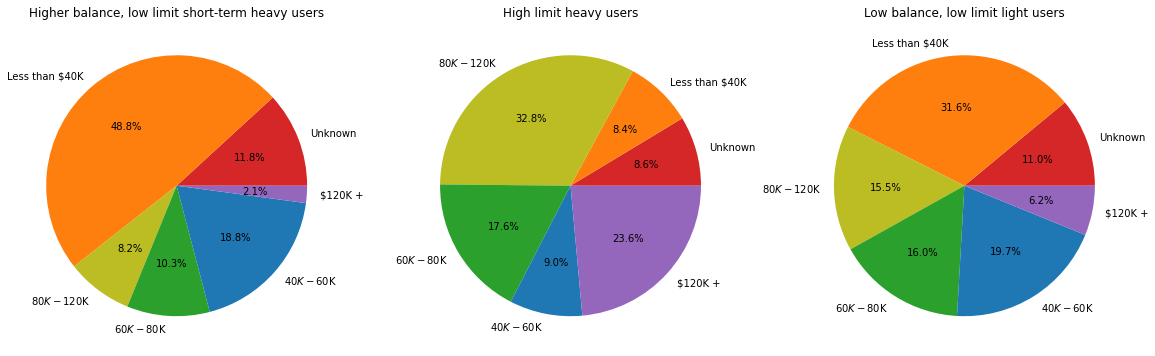

In [58]:
# Income Category
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

customerChurn_df[customerChurn_df['cluster'] == 0]['Income_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0], ylabel='', title='Higher balance, low limit short-term heavy users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 1]['Income_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1], ylabel='', title='High limit heavy users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 2]['Income_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2], ylabel='', title='Low balance, low limit light users', colors=['tab:red','tab:orange','tab:olive','tab:green','tab:blue', 'tab:purple'], autopct='%.1f%%')

plt.show()

Group 1: high balance low limit short-term heavy user

Around half of customers earn less than 40K. 40K-60K is the second most group. People in this group might be less wealthy.

Group 2: high limit heavy user

People earn 80K-120K make up the most in this group. The second most are people earn more than 120K. People in this group might be more wealthy.

Group 3: low balance low limit long-time light user

People earn less than 40K make up the most in this group. The second most are people earn 40K-60K. People in this group might be less wealthy, but maybe with slightly more money than the people from group 1 do.

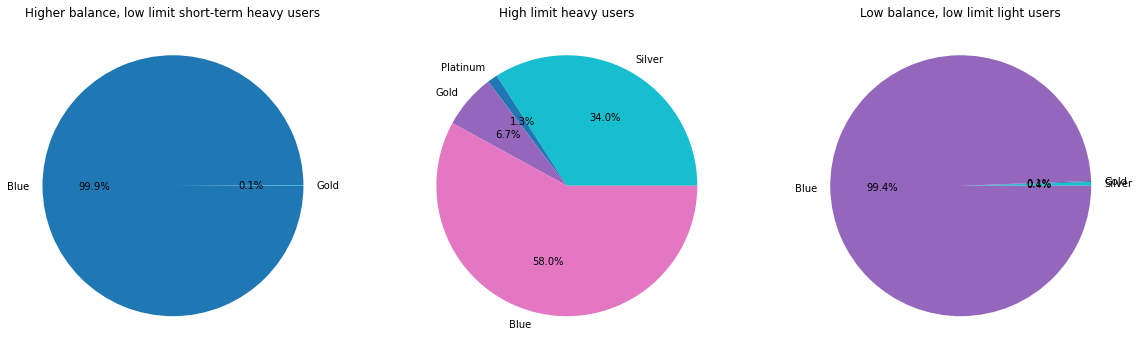

In [59]:
# Card Category
fix, axs = plt.subplots(ncols=3, figsize=(20,6))

customerChurn_df[customerChurn_df['cluster'] == 0]['Card_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0], ylabel='', title='Higher balance, low limit short-term heavy users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 1]['Card_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1], ylabel='', title='High limit heavy users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')
customerChurn_df[customerChurn_df['cluster'] == 2]['Card_Category_Original'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2], ylabel='', title='Low balance, low limit light users', colors=['tab:cyan','tab:blue','tab:purple','tab:pink'], autopct='%.1f%%')

plt.show()

Group 1: high balance low limit short-term heavy user
Group 3: low balance low limit long-time light user

Both group 1 and group 3 have more than 99% of customers that are with Blue level card, which is the basic card type. I assume this corresponds to the result from income category since people from these 2 groups earn less than the people from group 2.


Group 2: high limit heavy user

Although 58% of customers in this group have Blue level card, we can still notice that there's 34% of customers in this group with Silver level card and 6.7% with the Gold one. This, combined with income category result, I assume people in this group is more capable of spending with credit cards and paying back at the same time, so that it is more likely for them to be upgraded to a better level of card type.